In [1]:
#Importing all the necessary modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading csv file
df=pd.read_csv("vehicle.csv")

In [3]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
df.isnull().values.any()

True

In [5]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [6]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [7]:
df.shape

(846, 19)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


# 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

There are null values in the dataframe, replacing with median.

In [9]:
df=df.fillna(df.mean())
df.isnull().values.any()

False

In [10]:
def class_to_numeric(x):
    if x=='bus':
        return 3
    if x=='van':
        return 2
    if x=='car':
        return 1

In [11]:
df['class'] = df['class'].apply(class_to_numeric)


In [12]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,3


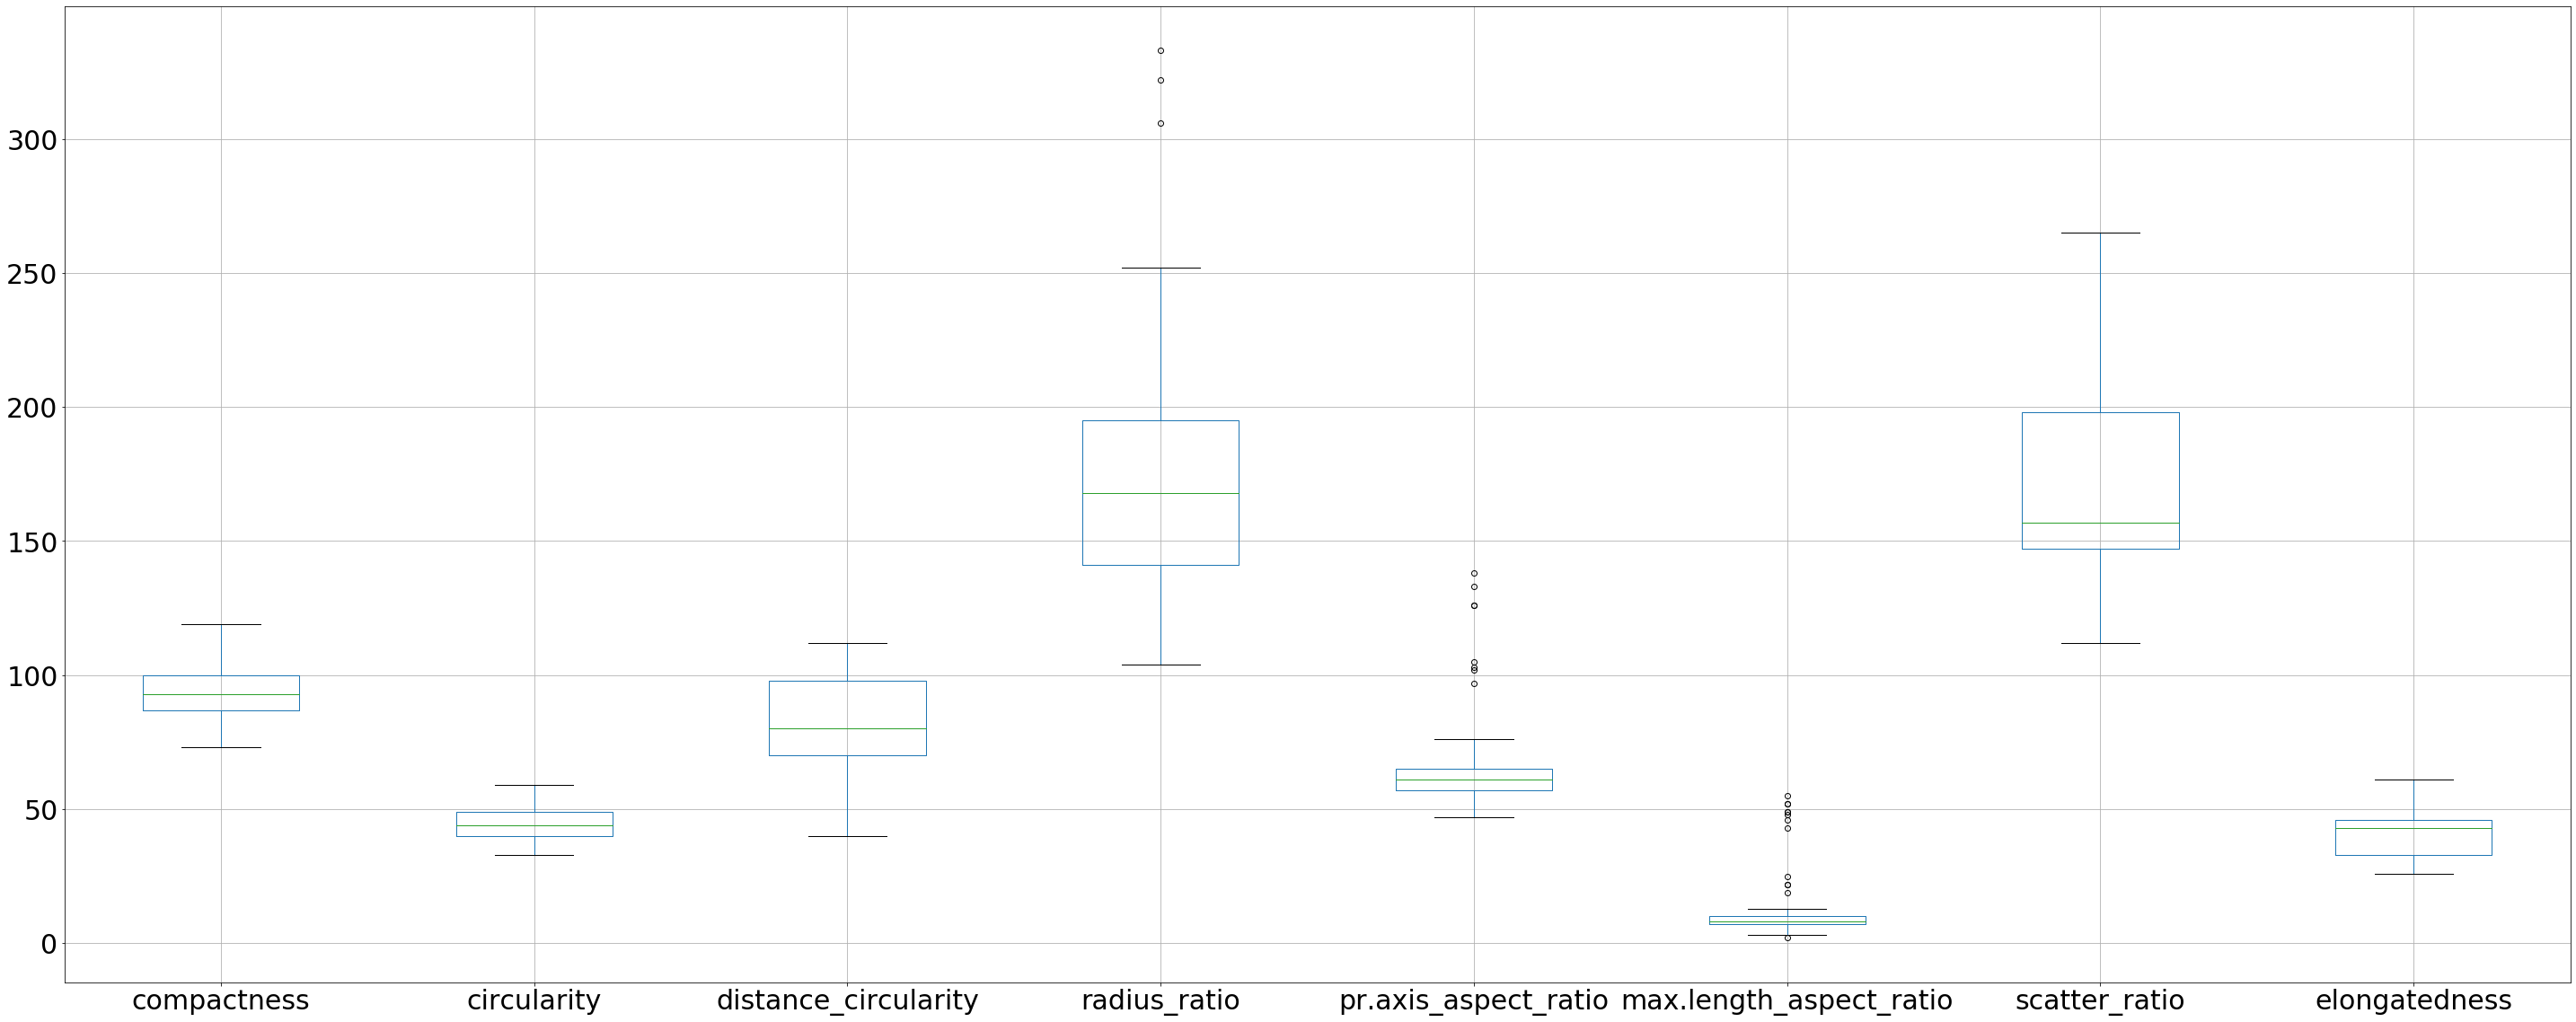

In [13]:
df.boxplot(column=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness'],figsize=(50,20),fontsize=30,grid=True)

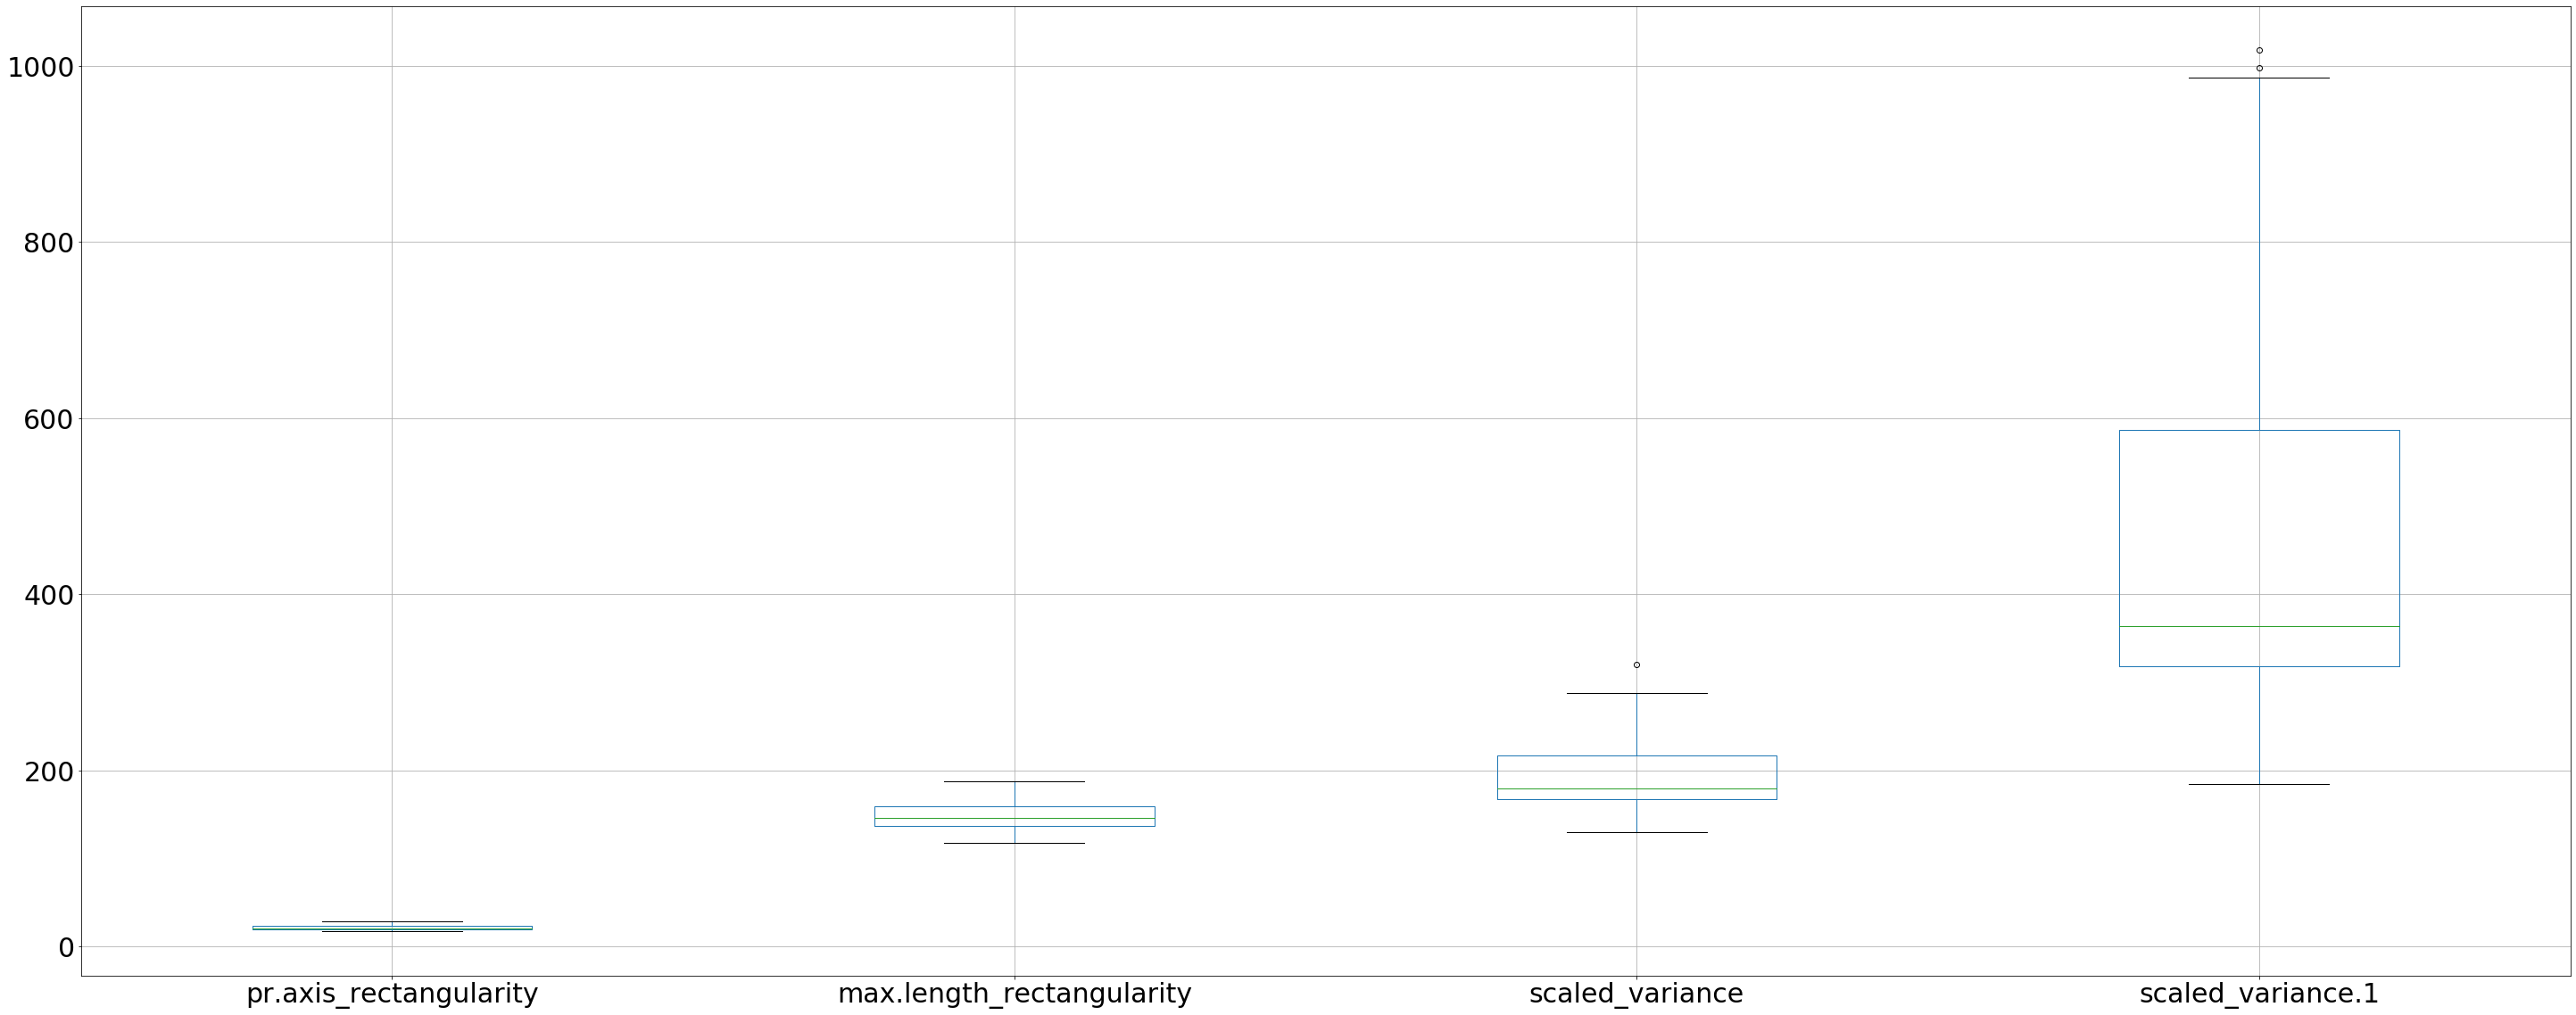

In [14]:
df.boxplot(column=['pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1'
                  ],figsize=(50,20),fontsize=30,grid=True)

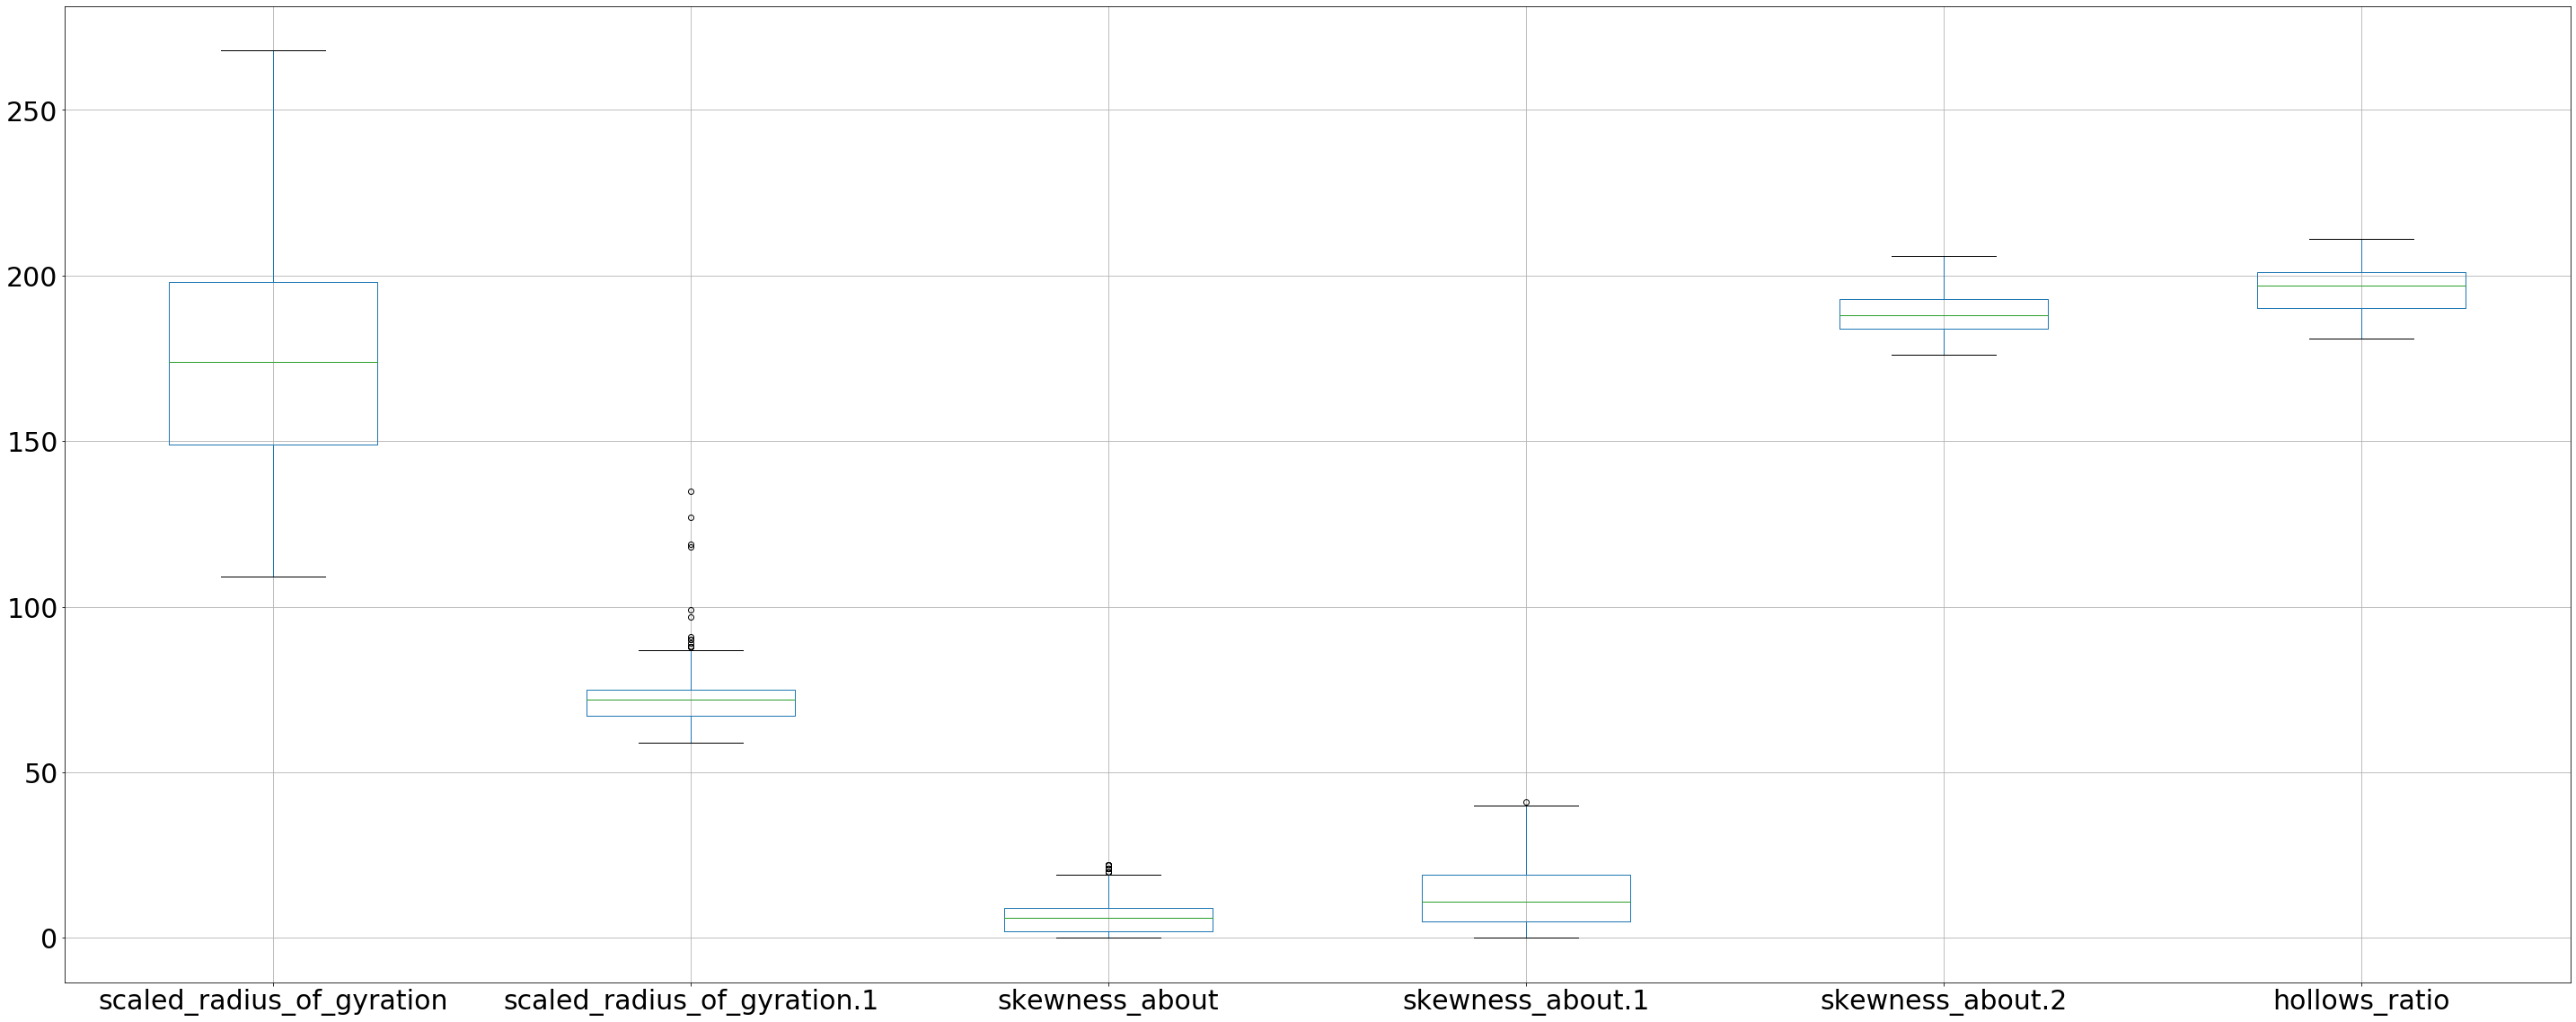

In [15]:
df.boxplot(column=[ 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],figsize=(50,20),fontsize=30,grid=True)

there are outliers so need to remove them

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [17]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

In [ ]:
b=sns.pairplot(df,diag_kind='kde')

1. There are multiple attributes with negative and positive correlation
2. Data distribution is fine with not a lot of variance 
3. compactness has high positive correlation with three features: scatter_ratio,scaled_variance.1,pr.axis_rectangularity
4. elongatedness is highly negatively correlated to multiple features
5. class variable is not correlated to any independent variable

In [40]:
df.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.679901,0.786810,0.746091,0.200887,0.497660,0.810430,-0.788449,0.811810,0.674166,0.792230,0.814537,0.577596,-0.254274,0.200199,0.161505,0.295404,0.364160,-0.256532
circularity,0.679901,1.000000,0.787513,0.641013,0.205616,0.563732,0.844049,-0.816212,0.841827,0.961873,0.803324,0.835218,0.926273,0.067633,0.140639,-0.014774,-0.118122,0.038081,-0.117409
distance_circularity,0.786810,0.787513,1.000000,0.808392,0.245423,0.668662,0.904856,-0.908822,0.894892,0.768843,0.884633,0.889593,0.702683,-0.237766,0.098711,0.263514,0.128336,0.320969,-0.367940
radius_ratio,0.746091,0.641013,0.808392,1.000000,0.666403,0.460737,0.789305,-0.844374,0.763736,0.577067,0.793528,0.778087,0.550726,-0.403672,0.040348,0.187295,0.418257,0.504630,-0.266711
pr.axis_aspect_ratio,0.200887,0.205616,0.245423,0.666403,1.000000,0.138243,0.199988,-0.302280,0.169522,0.146175,0.215642,0.187041,0.153722,-0.325331,-0.051643,-0.028793,0.406247,0.419789,0.121964
max.length_aspect_ratio,0.497660,0.563732,0.668662,0.460737,0.138243,1.000000,0.497043,-0.502220,0.497641,0.647844,0.411749,0.459248,0.404216,-0.333074,0.083734,0.141178,0.056225,0.394449,-0.457276
scatter_ratio,0.810430,0.844049,0.904856,0.789305,0.199988,0.497043,1.000000,-0.971404,0.989034,0.806303,0.977143,0.993807,0.794274,0.001917,0.063319,0.214919,-0.003595,0.115782,-0.221375
elongatedness,-0.788449,-0.816212,-0.908822,-0.844374,-0.302280,-0.502220,-0.971404,1.000000,-0.950026,-0.769684,-0.965252,-0.957135,-0.762109,0.087179,-0.044795,-0.184625,-0.104837,-0.210884,0.193760
pr.axis_rectangularity,0.811810,0.841827,0.894892,0.763736,0.169522,0.497641,0.989034,-0.950026,1.000000,0.810894,0.964170,0.989139,0.792606,0.017604,0.071871,0.216661,-0.026842,0.097842,-0.228574
max.length_rectangularity,0.674166,0.961873,0.768843,0.577067,0.146175,0.647844,0.806303,-0.769684,0.810894,1.000000,0.749909,0.795560,0.866913,0.052080,0.134511,-0.002135,-0.117988,0.067177,-0.113830


# 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [19]:
X = df.drop(['class'],axis=1)
Y = df['class']

In [20]:
from scipy.stats import zscore
from sklearn.decomposition import PCA
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.172252,0.523466,0.053747,0.320072,1.923432,0.917511,-0.210713,0.143877,-0.227406,0.763046,-0.395233,-0.346342,0.297376,-0.324651,-0.038827,0.379277,-0.324960,0.176759
1,-0.324348,-0.622825,0.118142,-0.853274,-0.743978,0.429013,-0.607553,0.532460,-0.619313,-0.342266,-0.593421,-0.628218,-0.506085,-0.001548,0.608967,0.154972,0.002432,0.449185
2,1.289602,0.850978,1.534843,1.303146,0.856468,0.917511,1.162963,-1.151399,0.948314,0.693964,1.157236,1.126314,1.409861,0.160003,1.688623,-0.405791,-0.161264,0.040546
3,-0.076048,-0.622825,-0.010649,-0.282457,0.322986,0.429013,-0.760183,0.661988,-0.619313,-0.342266,-0.923733,-0.749022,-1.464058,-1.455512,-0.038827,-0.293639,1.639395,1.538891
5,1.662052,0.004159,1.534843,0.129800,-1.988770,-1.036481,2.628217,-1.928565,2.907848,1.453866,3.040018,2.978639,2.769565,2.098622,-0.254758,-0.405791,-1.307138,-1.730226


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(XScaled,Y,random_state=7)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(609, 18) (204, 18) (609,) (204,)


# 4. Train a Support vector machine using the train set and get the accuracy on the test set

In [22]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)

print("Accuracy on training set: {}".format(svc.score(X_train, Y_train)))
print("Accuracy on test set: {}".format(svc.score(X_test, Y_test)))

Accuracy on training set: 0.9786535303776683
Accuracy on test set: 0.9607843137254902


# 5. Perform K-fold cross validation and get the cross validation score of the model

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
kf = KFold(n_splits=10) 

model=SVC()

In [24]:
scores = cross_val_score(model, XScaled, Y, cv=kf)
print ('Cross-validated scores:', scores)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Cross-validated scores: [0.93902439 1.         0.96341463 1.         0.96296296 0.97530864
 0.97530864 0.9382716  0.96296296 0.97530864]
Accuracy: 96.926% (1.997%)


# 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [25]:
covMatrix = np.cov(XScaled,rowvar=False)

In [26]:
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

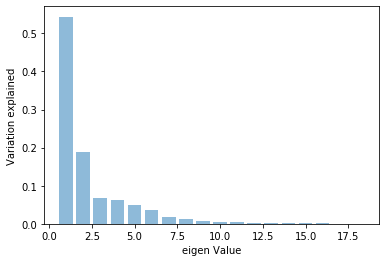

In [27]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

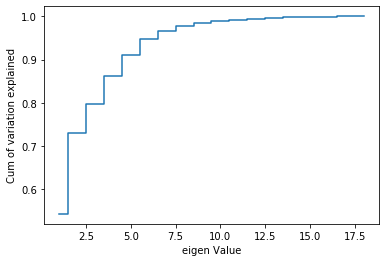

In [28]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [29]:
pca3 = PCA(n_components=10)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.27222643  0.2854862   0.30142449  0.27258836  0.0985978   0.19469421
   0.31028635 -0.30834277  0.30754394  0.27625762  0.30279301  0.30743531
   0.26147289 -0.04373715  0.03657989  0.05896075  0.03471251  0.08274638]
 [-0.08981662  0.1338806  -0.04376442 -0.20420454 -0.25901943 -0.09451451
   0.07224379 -0.01161517  0.08418285  0.12578009  0.06966463  0.07741706
   0.20996729  0.50394436 -0.01443018 -0.09344453 -0.5017323  -0.50649825]
 [-0.02225834 -0.21081277  0.07075372  0.03917597 -0.1165428  -0.13827241
   0.11316039 -0.09027478  0.11080192 -0.21958436  0.14510475  0.11458812
  -0.21377238  0.06711504 -0.52101461  0.68772545 -0.06246752 -0.04071189]
 [-0.13036553  0.02009916 -0.10714118  0.2529595   0.60503868 -0.32292373
   0.01010871 -0.08040181 -0.01576088 -0.06719238  0.07025707  0.01722151
   0.07180741  0.13602378 -0.49122037 -0.37866798  0.03523016 -0.10311284]
 [ 0.15203045 -0.13794153 -0.08053831  0.11934684  0.08373358 -0.62152961
   0.08160988 -0.07472889  0.07643

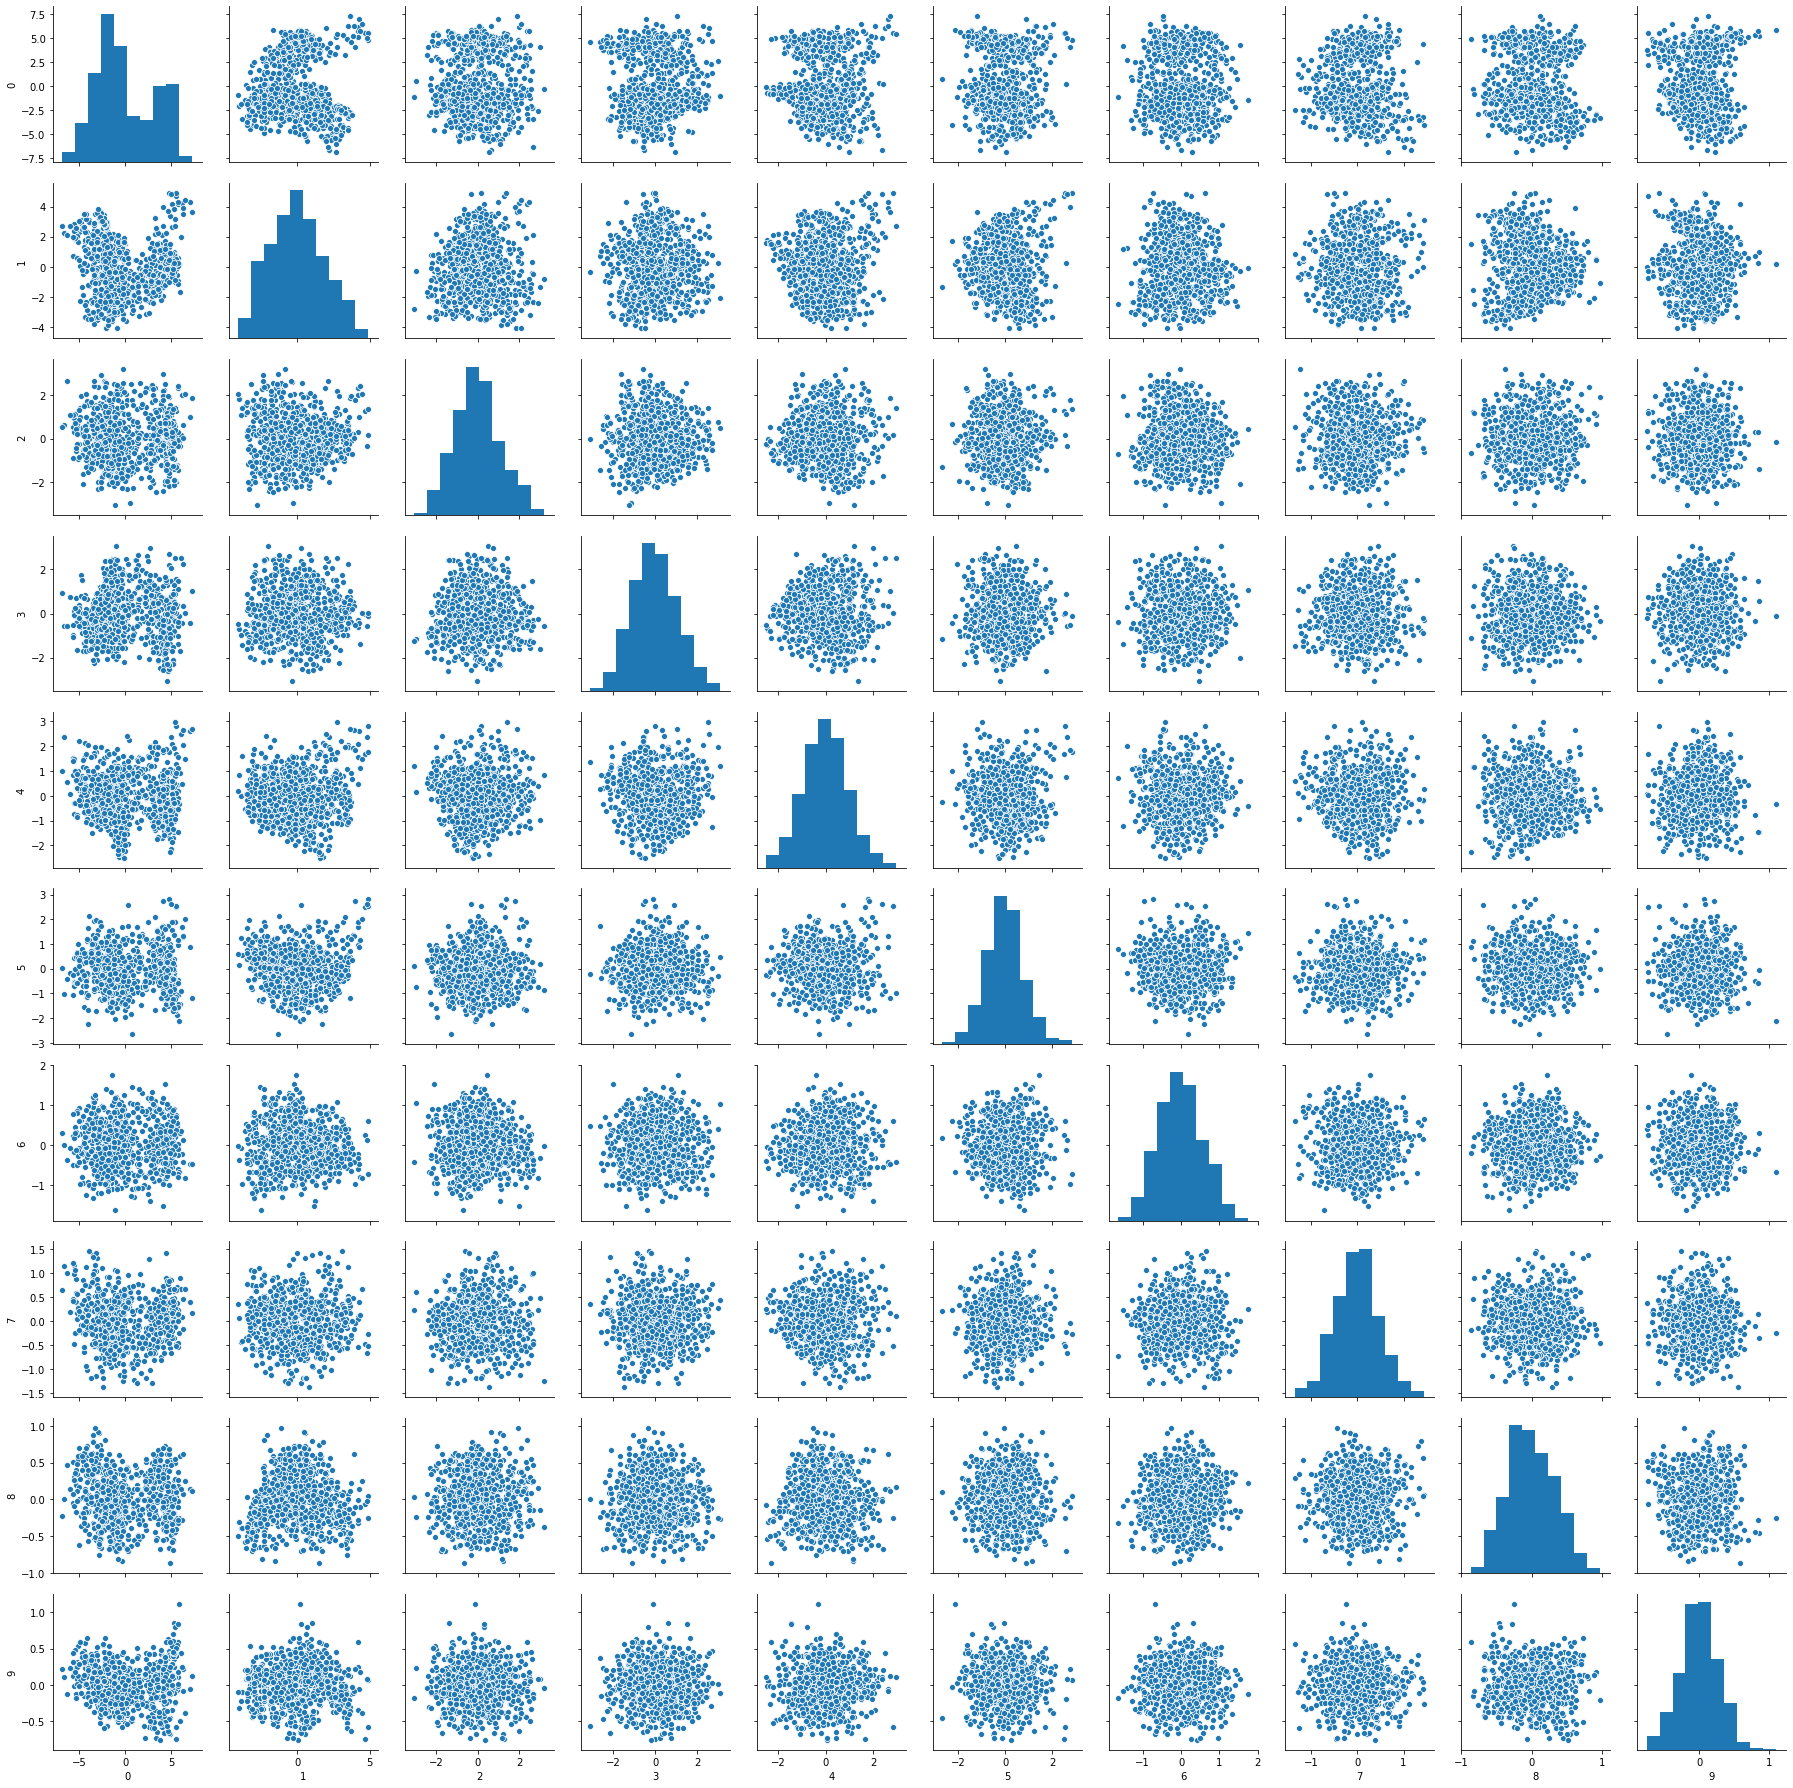

In [30]:
sns.pairplot(pd.DataFrame(Xpca3))

# 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state)

In [31]:
X_pca=pd.DataFrame(Xpca3)

In [32]:
X_pca.shape

(813, 10)

In [33]:
X_train_pca,X_test_pca,Y_train_pca,Y_test_pca = train_test_split(X_pca,Y,random_state=7)
print(X_train_pca.shape,X_test_pca.shape,Y_train_pca.shape,Y_test_pca.shape)

(609, 10) (204, 10) (609,) (204,)


In [34]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_pca, Y_train_pca)

print("Accuracy on training set: {}".format(svc.score(X_train_pca, Y_train_pca)))
print("Accuracy on test set: {}".format(svc.score(X_test_pca, Y_test_pca)))

Accuracy on training set: 0.9770114942528736
Accuracy on test set: 0.9558823529411765


In [35]:
scores = cross_val_score(model, X_pca, Y, cv=kf)
print ('Cross-validated scores:', scores)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Cross-validated scores: [0.93902439 1.         0.96341463 0.97530864 0.95061728 0.97530864
 0.96296296 0.95061728 0.96296296 0.97530864]
Accuracy: 96.555% (1.625%)


# 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings

Accuracy on test set without PCA : 0.9607843137254902


Accuracy on test set after PCA and only 10 features : 0.9558823529411765

Accuracy score decreased (~1%) by reducing features from 18 to 10 which is a good score with almost half of the reduced features

K-cross validation score SVM without PCA : 96.926% (1.997%)

K-cross validation score SVM after PCA :  96.555% (1.625%)

cross validation score also had a drop of less than 1%